In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.spatial import Delaunay
from collections import defaultdict
from itertools import permutations
from scipy.spatial import distance
from numpy import linalg as LA
import networkx.algorithms.community as nx_comm
import math
import random as rd

### Extracting TDA mertics from agents.dat file

In [13]:
# Define path where the angents.dat files are stored. These files are from the last time step.
path = '/Users/surajsahu/Documents/Vasculogensis/Simulation/TDA/';
filename = 'fr000238.dat' ;

# Read file into dataframe
df = pd.read_csv(path + filename, sep="\s+",header = None)
df = df[0].str.split(',', expand=True)
points = df[[0,1]].to_numpy()

ParserError: Error tokenizing data. C error: Expected 6 fields in line 2, saw 7


In [25]:
df = pd.read_csv(path + filename,sep="\s+", header=None, names=list(range(300)))
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,0.000000,-40.108120,-40.541779,0.673759,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.826413,-36.358303,-39.742172,1.803084,1.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.000000,-32.202061,-41.079239,2.678437,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.000000,-21.902025,-43.139801,-0.597038,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.000000,-17.638727,-39.638527,1.369823,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,0.000000,18.661446,39.954124,-1.345588,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,221,0.000000,22.100399,40.554188,-2.359871,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,222,0.000000,27.635206,41.706539,-2.919616,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,223,0.000000,35.812687,44.374359,1.623250,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Make the Delaunay Triangulation
tri = Delaunay(points)

#Plot
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.title('Vasucular network Delaynay Triangulation')
plt.show()

In [ ]:
#Now I will use this triangulation to define nodes and edges of a graph

#finding all the neighbors of each vertex
_neighbors = defaultdict(set)
for simplex in tri.vertices:
    for i, j in permutations(simplex, 2):
        _neighbors[i].add(j)
#list those neighbors via their index
points = [tuple(p) for p in tri.points]
neighbors = {}
for k, v in _neighbors.items():
    neighbors[k] = [i for i in v]

In [ ]:
# Now I will make the graph
# First I add all the points to the graph
G = nx.Graph()
for i in range(len(points)):
  G.add_node(i)
print('G num nodes: ' + str(G.number_of_nodes()))

In [ ]:
# Verify what the graph nodes look like
pos = {}
for k in neighbors:
    v = points[k]
    pos[k] = [i for i in v]
fig, ax = plt.subplots()
nx.draw(G, pos=pos, node_color='k',node_size=15, ax=ax)
plt.title('Graph')

In [ ]:
# Now I will only keep edges within a certain distance
G.remove_edges_from(G.edges())
for k in neighbors:
    node1 = k
    for j in neighbors[k]:
      node2 = j
      if distance.euclidean(points[node1],points[node2]) < 4:
        G.add_edge(node1,node2)
print('G num edges: ' + str(G.number_of_edges()))

In [ ]:
# plot the new result
fig, ax = plt.subplots()
nx.draw(G, pos=pos, node_color='k', node_size = 15, ax=ax)
plt.title('Graph')

### Extrating TDA metrics from frames

In [368]:
def triangulation(file_name):
    df = pd.read_csv(file_name, sep="\s+",header = None,usecols=[1,2])
    points = df[[1,2]].to_numpy()
    tri = Delaunay(points)
    _neighbors = defaultdict(set)
    for simplex in tri.vertices:
        for i, j in permutations(simplex, 2):
            _neighbors[i].add(j)
    #list those neighbors via their index
    points = [tuple(p) for p in tri.points]
    neighbors = {}
    for k, v in _neighbors.items():
        neighbors[k] = [y for y in v]
    G = nx.Graph()
    for p in range(len(points)):
        G.add_node(p)
    pos = {}
    for e in neighbors:
        d = points[e]
        pos[e] = [s for s in d]    
    G.remove_edges_from(G.edges())
    for h in neighbors:
        node1 = h
        for g in neighbors[h]:
            node2 = g
            if distance.euclidean(points[node1],points[node2]) < 3:
                G.add_edge(node1,node2)
                
    return G, pos

In [443]:
#File path
dir_path = '/Users/surajsahu/Documents/Vasculogensis/Simulation/TDA/'

os.chdir(dir_path)

filename = 'fr099900'

G, pos = triangulation(filename)

Text(0.5, 1.0, 'figure')

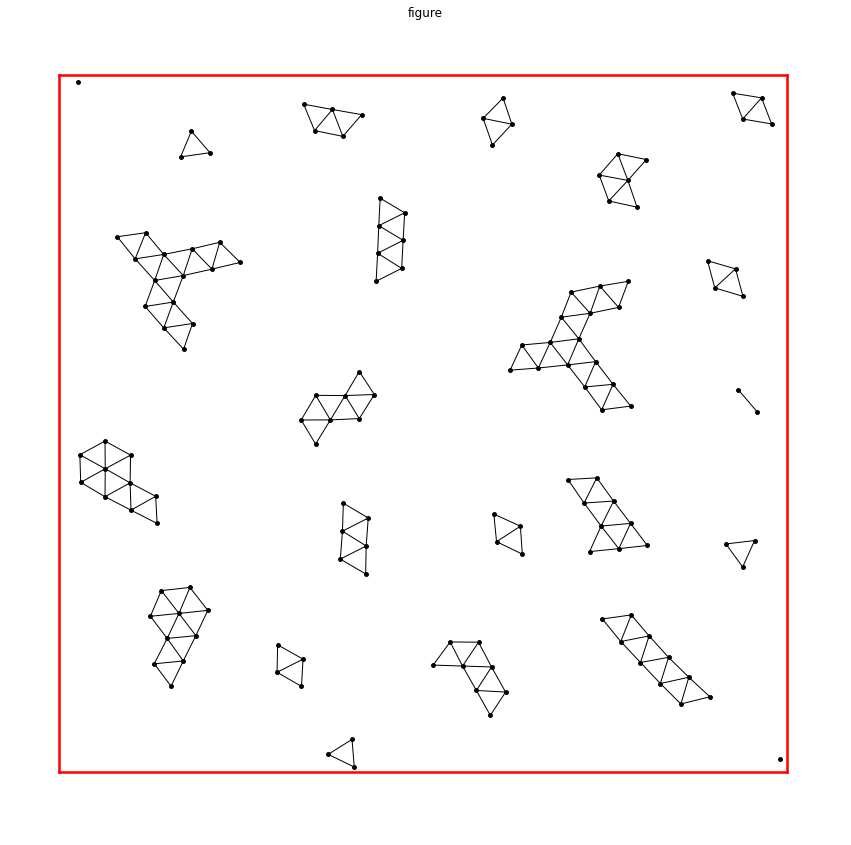

In [444]:
fig, ax = plt.subplots(figsize=(15,15))
plt.plot([-25,25],[-25,-25],"r-", linewidth = 2.5) ## xmin to xmax at ymin
plt.plot([-25,25],[25,25],"r-", linewidth = 2.5) ## xmin to xmax at ymax
plt.plot([-25,-25],[-25,25],"r-", linewidth = 2.5) ## ymin to ymax at xmin
plt.plot([25,25],[-25,25],"r-", linewidth = 2.5) ## ymin to ymax at xmax
nx.draw(G, pos=pos, node_color='k', node_size = 15, ax=ax)
plt.title('figure')

In [457]:
H = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
H = nx.Graph(H)
len(H.nodes())

17

In [458]:
sample = rd.sample(list(H.edges), 30)

for i in sample:
    v,u = i
    H.remove_edge(v,u)

In [459]:
for i in list(H.nodes()):
    if H.degree[i] == 0:
        H.remove_node(i)
len(H.nodes())

2

Text(0.5, 1.0, 'figure')

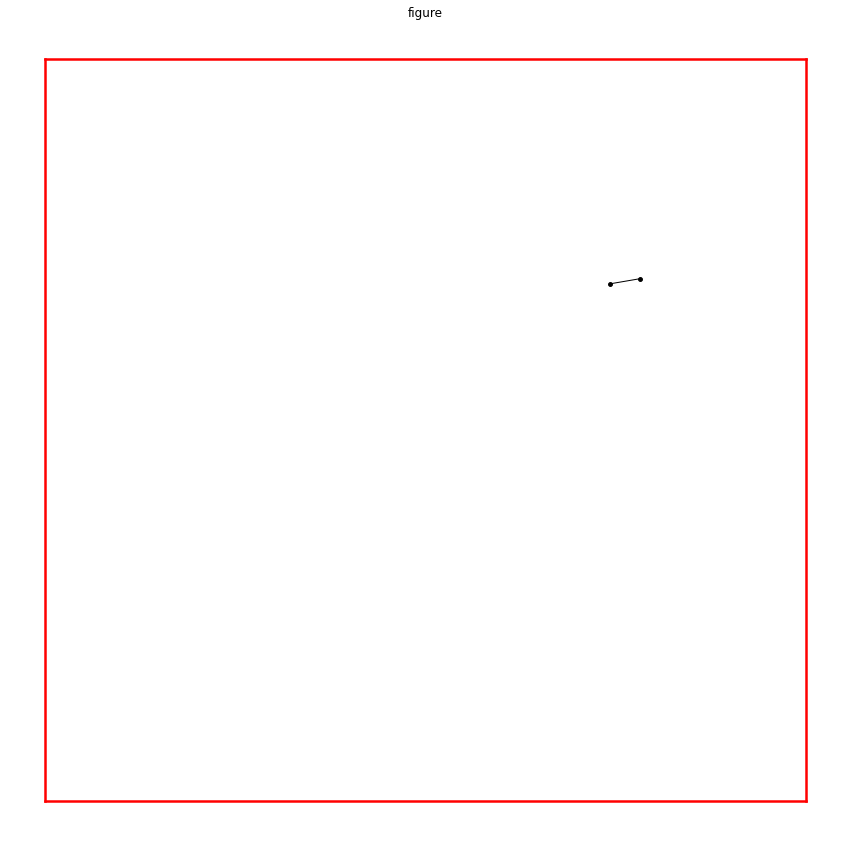

In [460]:
fig, ax = plt.subplots(figsize=(15,15))
plt.plot([-25,25],[-25,-25],"r-", linewidth = 2.5) ## xmin to xmax at ymin
plt.plot([-25,25],[25,25],"r-", linewidth = 2.5) ## xmin to xmax at ymax
plt.plot([-25,-25],[-25,25],"r-", linewidth = 2.5) ## ymin to ymax at xmin
plt.plot([25,25],[-25,25],"r-", linewidth = 2.5) ## ymin to ymax at xmax
nx.draw(H, pos=pos, node_color='k', node_size = 15, ax=ax)
plt.title('figure')

In [474]:
H = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
H = nx.Graph(H)
ni = len(H.nodes())
for j in range(int(ni/2)):
    sample = rd.sample(list(H.edges), j)
    for i in sample:
        v,u = i
        H.remove_edge(v,u)
        
len(H.nodes())

17

## Average neighbor degree

In [38]:
# Now we can do some graph metrics
def neighbor_degree(G):
    my_dict = nx.average_neighbor_degree(G)
    return np.array(list(my_dict.values()))

In [34]:
df = pd.DataFrame.from_dict(ave_neighbor_degree(G),orient='index',columns = ['Sim'])
frames = [df]
df_all = pd.concat(frames)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

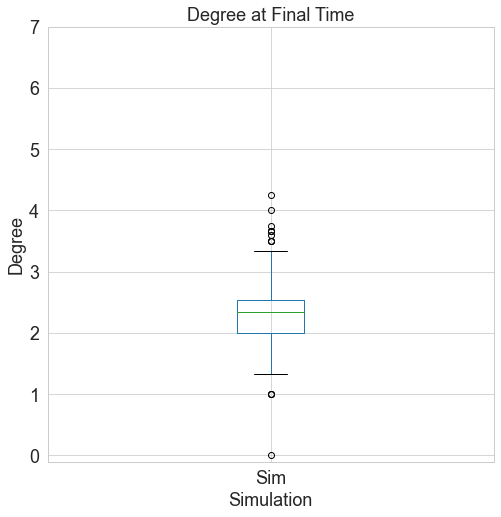

In [20]:
#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(8,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.1,7))
boxplot.set_ylabel('Degree',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree at Final Time",fontsize = 18)
plt.show()

# Selected TDA metrics

## Link Density


$\frac{2m}{n(n-1)}$ where $n$ is the number of nodes and $m$ is the number of edges.  The density is $0$ for a graph without edges and $1$ for a complete graph. The density can be higher than 1 if there are loops.

In [9]:
# Now we can do some graph metrics
def density(G):
    return nx.density(G)


## Algebraic Connectivity

The second smallest eigenvalue of the Laplacian matrix (i.e. degree matrix minus adjacency matrix) of the graph


In [ ]:
def algebraic_connectivity(G):
     return nx.algebraic_connectivity(G, normalized=False, tol=1e-21, method='tracemin_pcg', seed=None)

## Global Clustering Coeffcient or Transitivity

The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed).

In [ ]:
def transitivity(G):
    return nx.transitivity(G)

## Average path length

The average shortest distance d (i.e. the minimum number of links from one node to the other) between any pair of nodes v_i and v_j (Yazdani et al., 2011)

$a=\sum_{s, t \in V} \frac{d(s, t)}{n(n-1)}$

In [ ]:
def average_path_length(G):
    f=[]
    for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        f.append(nx.average_shortest_path_length(C))
    return max(f)

## Central Point Dominance

Average difference in betweenness (the number of shortest paths between pairs of nodes that traverse a node) of the most central node B_max and all other nodes in the network

$\frac{1}{n-1} \times \sum_{i=1}^{n}\left(B_{\max }-B_{i}\right)$

In [ ]:
def central_point_dominance(G):
    my_dict = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=True, seed=None)
    Bmax = max(list(my_dict.values()))
    B = list(my_dict.values())
    return np.sum([Bmax - x for x in B])/(len(B)-1)

## Heterogeneity

Coefficient of variance in nodal degree ($\bar{k}$ is the average nodal degree of the graph) 

$\frac{1}{\bar{k}} \times \sum_{i=1}^{n}\left(k_{i}-\bar{k}\right)^{2}$

In [ ]:
def heterogenity(G):
    return np.var([y for x,y in list(G.degree)])

## Spectral gap

The difference between the largest two eigenvalues λ of the Laplacian matrix of the graph


In [9]:
def spectral_gap(G):
    Gm = nx.laplacian_spectrum(G)
    newGm = set(Gm)
    newGm.remove(max(Gm))
    return max(Gm)-max(newGm)

spectral_gap(G)

0.20817415570556896

## Physical Efficency of the largest component

In [221]:
H = G.subgraph(list(nx.connected_components(G))[0])
lengths=[]
for edge in H.edges():
    startnode=edge[0] 
    endnode=edge[1]
    c = round(math.sqrt(((pos[endnode][1]-pos[startnode][1])**2) + ((pos[endnode][0]-pos[startnode][0])**2)),2)
    lengths.append([startnode, endnode, c])
G = nx.Graph()
for i in lengths:
    G.add_edge(i[0], i[1], weight=i[2])

D =[]
for j in list(G.nodes()):
    dis = nx.single_source_dijkstra_path_length(G, j)
    for i in sorted(dis):
        if dis[i] == 0:
            D.append(0)
        else:
            D.append(1/dis[i])
N = len(G.nodes)
(1/(N*(N-1)))*np.sum(D)


0.05231350940802586

In [269]:
def physical_efficency(file_name):
    df = pd.read_csv(file_name, sep="\s+",header = None,usecols=[1,2])
    points = df[[1,2]].to_numpy()
    tri = Delaunay(points)
    _neighbors = defaultdict(set)
    for simplex in tri.vertices:
        for i, j in permutations(simplex, 2):
            _neighbors[i].add(j)
    #list those neighbors via their index
    points = [tuple(p) for p in tri.points]
    neighbors = {}
    for k, v in _neighbors.items():
        neighbors[k] = [y for y in v]
    G = nx.Graph()
    for p in range(len(points)):
        G.add_node(p)
    pos = {}
    for e in neighbors:
        d = points[e]
        pos[e] = [s for s in d]    
    G.remove_edges_from(G.edges())
    for h in neighbors:
        node1 = h
        for g in neighbors[h]:
            node2 = g
            if distance.euclidean(points[node1],points[node2]) < 3:
                G.add_edge(node1,node2)
                           
    H = G.subgraph(list(nx.connected_components(G))[0])
    lengths=[]
    for edge in H.edges():
        startnode=edge[0] 
        endnode=edge[1]
        c = round(math.sqrt(((pos[endnode][1]-pos[startnode][1])**2) + ((pos[endnode][0]-pos[startnode][0])**2)),2)
        lengths.append([startnode, endnode, c])
    G = nx.Graph()
    for i in lengths:
        G.add_edge(i[0], i[1], weight=i[2])

    D =[]
    for j in list(G.nodes()):
        dis = nx.single_source_dijkstra_path_length(G, j)
        for i in sorted(dis):
            if dis[i] == 0:
                D.append(0)
            else:
                D.append(1/dis[i])
    N = len(G.nodes)
    return (1/(N*(N-1)))*np.sum(D)

In [266]:
def MST(file_name):
    df = pd.read_csv(file_name, sep="\s+",header = None,usecols=[1,2])
    points = df[[1,2]].to_numpy()
    tri = Delaunay(points)
    _neighbors = defaultdict(set)
    for simplex in tri.vertices:
        for i, j in permutations(simplex, 2):
            _neighbors[i].add(j)
    #list those neighbors via their index
    points = [tuple(p) for p in tri.points]
    neighbors = {}
    for k, v in _neighbors.items():
        neighbors[k] = [y for y in v]
    G = nx.Graph()
    for p in range(len(points)):
        G.add_node(p)
    pos = {}
    for e in neighbors:
        d = points[e]
        pos[e] = [s for s in d]    
    G.remove_edges_from(G.edges())
    for h in neighbors:
        node1 = h
        for g in neighbors[h]:
            node2 = g
            if distance.euclidean(points[node1],points[node2]) < 10000:
                G.add_edge(node1,node2)
                           
    H = G.subgraph(list(nx.connected_components(G))[0])
    T = nx.minimum_spanning_tree(H)
    lengths=[]
    for edge in T.edges():
        startnode=edge[0] 
        endnode=edge[1]
        c = round(math.sqrt(((pos[endnode][1]-pos[startnode][1])**2) + ((pos[endnode][0]-pos[startnode][0])**2)),2)
        lengths.append([startnode, endnode, c])
    G = nx.Graph()
    for i in lengths:
        G.add_edge(i[0], i[1], weight=i[2])

    D =[]
    for j in list(G.nodes()):
        dis = nx.single_source_dijkstra_path_length(G, j)
        for i in sorted(dis):
            if dis[i] == 0:
                D.append(0)
            else:
                D.append(1/dis[i])
    N = len(G.nodes)
    return (1/(N*(N-1)))*np.sum(D)

In [271]:
def DT(file_name):
    df = pd.read_csv(file_name, sep="\s+",header = None,usecols=[1,2])
    points = df[[1,2]].to_numpy()
    tri = Delaunay(points)
    _neighbors = defaultdict(set)
    for simplex in tri.vertices:
        for i, j in permutations(simplex, 2):
            _neighbors[i].add(j)
    #list those neighbors via their index
    points = [tuple(p) for p in tri.points]
    neighbors = {}
    for k, v in _neighbors.items():
        neighbors[k] = [y for y in v]
    G = nx.Graph()
    for p in range(len(points)):
        G.add_node(p)
    pos = {}
    for e in neighbors:
        d = points[e]
        pos[e] = [s for s in d]    
    G.remove_edges_from(G.edges())
    for h in neighbors:
        node1 = h
        for g in neighbors[h]:
            node2 = g
            if distance.euclidean(points[node1],points[node2]) < 10000:
                G.add_edge(node1,node2)
    H = G.subgraph(list(nx.connected_components(G))[0])
    lengths=[]
    for edge in H.edges():
        startnode=edge[0] 
        endnode=edge[1]
        c = round(math.sqrt(((pos[endnode][1]-pos[startnode][1])**2) + ((pos[endnode][0]-pos[startnode][0])**2)),2)
        lengths.append([startnode, endnode, c])
    G = nx.Graph()
    for i in lengths:
        G.add_edge(i[0], i[1], weight=i[2])

    D =[]
    for j in list(G.nodes()):
        dis = nx.single_source_dijkstra_path_length(G, j)
        for i in sorted(dis):
            if dis[i] == 0:
                D.append(0)
            else:
                D.append(1/dis[i])
    N = len(G.nodes)
    return (1/(N*(N-1)))*np.sum(D)

In [272]:
#File path
dir_path = '/Users/surajsahu/Documents/Vasculogensis/Simulation/TDA/'

os.chdir(dir_path)

filename = 'fr099900'

print(physical_efficency(filename), MST(filename), DT(filename))


0.05231350940802586 0.02444141036262904 0.06036310510232272


## Modularity

Modularity is a measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities). Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules. Modularity is often used in optimization methods for detecting community structure in networks. However, it has been shown that modularity suffers a resolution limit and, therefore, it is unable to detect small communities. 

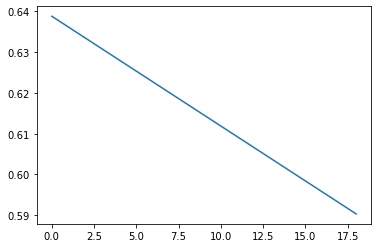

In [10]:
mod = []
for i in range(1,20,1):
    mod.append(nx_comm.modularity(G, nx_comm.label_propagation_communities(G), resolution = i*0.1))
plt.plot(mod)

In [21]:
nx_comm.label_propagation_communities(G)

dict_values([{0, 59, 34, 19}, {1, 13}, {2, 3, 14, 25, 26}, {16, 4, 29}, {32, 5, 31}, {18, 6}, {8, 33, 7}, {9, 10, 45, 47, 22}, {120, 11}, {35, 12}, {27, 15}, {17, 30, 41}, {20, 21, 46}, {140, 127, 23}, {24, 40, 36, 39}, {42, 28}, {37, 38}, {43, 44}, {48, 97}, {49, 85, 77}, {72, 50}, {64, 65, 75, 51, 52}, {66, 53, 54}, {67, 68, 81, 55, 91}, {131, 105, 80, 82, 56, 93, 95}, {57, 69}, {58, 70, 71}, {96, 74, 60}, {61, 94}, {76, 62}, {73, 63}, {92, 78}, {128, 79}, {107, 83, 118, 119}, {98, 84}, {86, 87}, {88, 99, 108}, {89, 103}, {90, 101, 102}, {113, 114, 100}, {104, 117}, {106, 109}, {110, 111}, {112, 126}, {115, 141}, {129, 116}, {121, 132, 133}, {122, 123, 134, 135}, {136, 124}, {125}, {130, 142, 143}, {137, 138, 139}])

No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D 

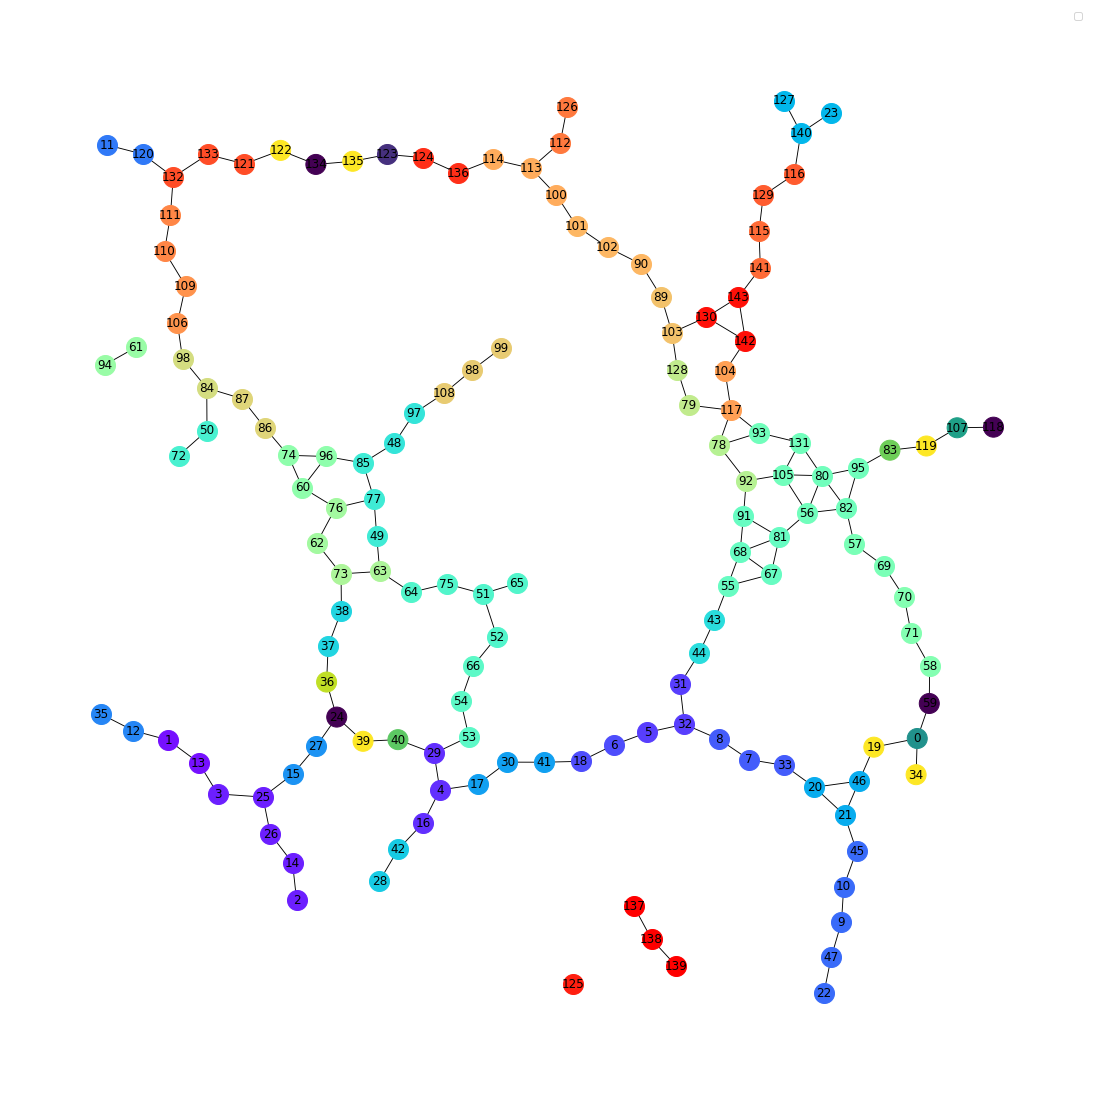

In [13]:
plt.figure(figsize=(15,15))
from matplotlib.pyplot import cm
nx.draw(G, pos, with_labels=True, font_weight='light', node_size= 15, width= 0.9)

C = list(nx_comm.label_propagation_communities(G))
n = len(C)
colo = cm.rainbow(np.linspace(0, 1, n))

for i, x in zip(range(n), colo):
    d = list(C[i])
    nx.draw_networkx_nodes(G, pos, node_size= 400, nodelist=d, node_color = x)
    plt.legend()
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specif

[[36, 37, 38, 48, 49, 60, 62, 63, 73, 74, 76, 77, 85, 88, 96, 97, 99, 108],
 [11, 50, 72, 84, 86, 87, 98, 106, 109, 110, 111, 120, 121, 122, 132, 133],
 [15, 24, 27, 29, 39, 40, 51, 52, 53, 54, 64, 65, 66, 75],
 [56, 78, 80, 82, 83, 92, 93, 95, 105, 107, 117, 118, 119, 131],
 [89, 90, 100, 101, 102, 112, 113, 114, 123, 124, 126, 134, 135, 136],
 [23, 79, 103, 104, 115, 116, 127, 128, 129, 130, 140, 141, 142, 143],
 [4, 5, 6, 16, 17, 18, 28, 30, 31, 32, 41, 42, 44],
 [7, 8, 9, 10, 19, 20, 21, 22, 33, 45, 46, 47],
 [1, 2, 3, 12, 13, 14, 25, 26, 35],
 [0, 34, 57, 58, 59, 69, 70, 71],
 [43, 55, 67, 68, 81, 91],
 [137, 138, 139],
 [61, 94],
 [125]]

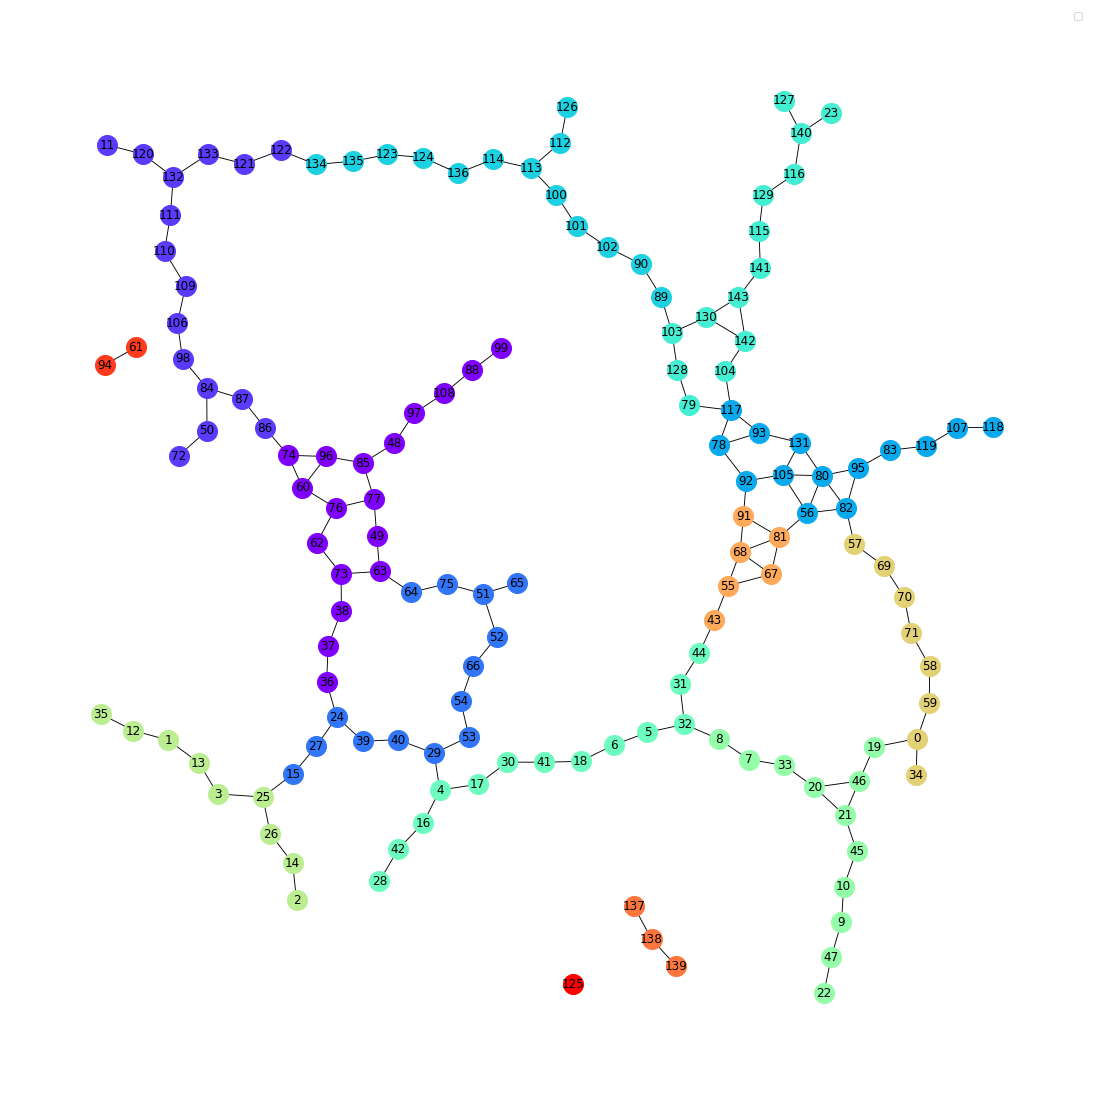

In [23]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G))

C=[]
for i in range(len(c)):
    C.append(sorted(c[i]))
    
plt.figure(figsize=(15,15))
from matplotlib.pyplot import cm
nx.draw(G, pos, with_labels=True, font_weight='light', node_size= 15, width= 0.9)

n = len(C)
colo = cm.rainbow(np.linspace(0, 1, n))

for i, x in zip(range(n), colo):
    d = list(C[i])
    nx.draw_networkx_nodes(G, pos, node_size= 400, nodelist=d, node_color = x)
    plt.legend()
    


In [29]:
c[0]

frozenset({36,
           37,
           38,
           48,
           49,
           60,
           62,
           63,
           73,
           74,
           76,
           77,
           85,
           88,
           96,
           97,
           99,
           108})

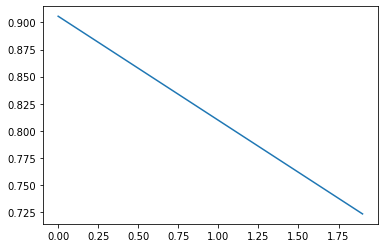

In [38]:
mod = []
re = []
for i in range(0,20,1):
    res = 0.1*i
    re.append(res)
    mod.append(nx_comm.modularity(G, c, resolution = res))
plt.plot(re, mod)

# Other TDA metrics

## Clustering



https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.approximation.clustering_coefficient.average_clustering.html#networkx.algorithms.approximation.clustering_coefficient.average_clustering

In [ ]:
my_dict = nx.average_clustering(G)
print('G has Clustering Coeff: ' + str(my_dict))


## Matching Index

https://www.frontiersin.org/articles/10.3389/fbioe.2020.00034/full

Need to code this one.

## Centrality

### Degree centrality

 for a node v is the fraction of nodes it is connected to.

In [ ]:
my_dict = nx.degree_centrality(G)
print(np.array(list(my_dict.values())).mean())
df = pd.DataFrame.from_dict(my_dict,orient='index',columns = ['Sim'])
frames = [df]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(8,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.05))
boxplot.set_ylabel('Degree Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Degree Centrality at Final Time",fontsize = 18)
plt.show()

### Closeness centrality 

for a node v is a measure to detect important nodes which can communicate quickly with other nodes in a network.


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality



In [ ]:
# Now we can do some graph metrics
my_dict = nx.closeness_centrality(G)
print(np.array(list(my_dict.values())).mean())
df = pd.DataFrame.from_dict(my_dict,orient='index',columns = ['Sim'])
frames = [df]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(8,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.3))
boxplot.set_ylabel('Closeness Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Closeness Centrality at Final Time",fontsize = 18)
plt.show()

### Betweenness centrality


for a node v shows the nodes which form such bridges so that two communities can communicate with each other. 

**Betweenness centrality (BC) ** measures the frequency of a particular node (cell) being traversed if the shortest paths between all pairs of cells are traveled (Brandes, 2001). In tangible terms, BC models the direct transport of information given prior knowledge of the fastest route to the destination.

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

In [1]:
# Now we can do some graph metrics
my_dict = nx.betweenness_centrality(G)
print(np.array(list(my_dict.values())).mean())
df = pd.DataFrame.from_dict(my_dict,orient='index',columns = ['Sim'])
frames = [df]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(8,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.4))
boxplot.set_ylabel('BetweennessCentrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Betweenness Centrality at Final Time",fontsize = 18)
plt.show()

NameError: name 'nx' is not defined

### Random-walk centrality

measures the frequency nodes are traversed by using random walkers between all pairs of cells. These random paths taken may not necessarily be the shortest and are stochastically determined by the paths followed by the random walkers. In contrast to BC, RWC reflects the potential diffusion of a signal through cells in a tissue, given that the signal has defined source and destination nodes.

First we will calculate the number of connected components of each Graph.

In [10]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
print('G has: ' +  str(len(S)) + ' connected components')

G has: 4 connected components


In [19]:
def random_walk_centrality(G):
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    my_dict = nx.current_flow_betweenness_centrality(S[0])
    return np.array(list(my_dict.values())).mean()

random_walk_centrality(G)

0.16422297887789822

0.16422297887789822


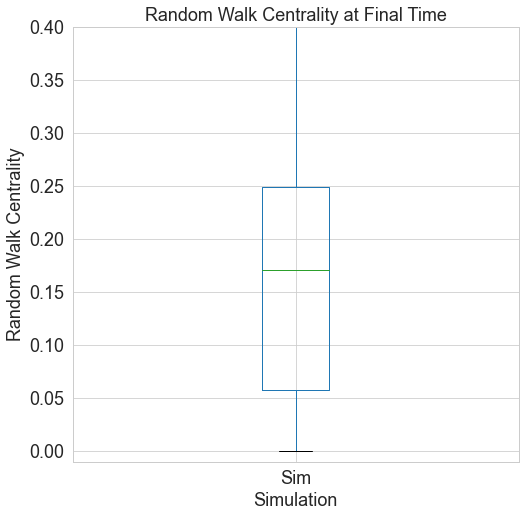

In [12]:
# Now we can do some graph metrics
my_dict = nx.current_flow_betweenness_centrality(S[0])
print(np.array(list(my_dict.values())).mean())
df = pd.DataFrame.from_dict(my_dict,orient='index',columns = ['Sim'])
frames = [df]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(8,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(-.01,.4))
boxplot.set_ylabel('Random Walk Centrality',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Random Walk Centrality at Final Time",fontsize = 18)
plt.show()

## Eccentricity 

of a node v is the maxmimum distance from v to all other nodes in G.

In [ ]:
# Now we can do some graph metrics
my_dict = nx.algorithms.distance_measures.eccentricity(S[0])
df = pd.DataFrame.from_dict(my_dict,orient='index',columns = ['Sim'])
frames = [df]
df_all = pd.concat(frames)

#seaborn setting
sns.set_style("whitegrid",rc = {"grid.linewidth": 0.1,'font.family': ['sans-serif'],'font.sans-serif': ['Arial']})
sns.set_context("paper", font_scale=1) 
plt.figure(figsize=(8,8))
flierprops = dict(marker = 'o', markersize=1,linestyle='none')
boxplot = df_all.boxplot(column = ['Sim'])
plt.xticks(fontsize = 18)
boxplot.set(ylim=(0,45))
boxplot.set_ylabel('Eccentricity',fontsize = 18)
boxplot.set_xlabel('Simulation',fontsize = 18)
plt.yticks(fontsize = 18)
boxplot.set_title("Eccentricity",fontsize = 18)
plt.show()


In [297]:
# Define path where the angents.dat files are stored. These files are from the last time step.
dir_path = '/Users/surajsahu/Documents/Vasculogensis/Simulation/Surajcodes/22.02.10/'
os.chdir(dir_path+'velocity_0.01noise_1.0gap_0.0neigh_3angle_4/0/data/')
filename = 'agents.dat' ;

# Read file into dataframe
df = pd.read_csv(filename, sep="\s+",header = None,usecols=[0,1,2,3,4,5,6,7])
points = df[[0,1]].to_numpy()

In [298]:
df

,0,1,2,3,4,5,6,7
0,-8.611760,1.215246,-0.771283,1.0,0,11,0,7
1,5.867203,6.758762,-2.671404,1.0,0,21,1,9
2,5.885579,-5.573862,-2.870459,1.0,0,24,2,5
3,3.238385,1.522964,1.000830,1.0,0,23,3,4
4,0.571323,-1.565974,-0.969040,1.0,0,22,3,4
...,...,...,...,...,...,...,...,...
139,-0.789887,12.643303,0.382889,1.0,0,12,10,25
140,12.730426,-3.595771,-1.257923,1.0,0,16,19,21
141,9.508392,-7.324139,1.756078,1.0,0,18,2,19
142,4.583099,-6.324163,-1.663846,1.0,0,25,2,5
